
Car Price Prediction using **Linear Regression**
This script predicts used car selling prices based on various features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Load the dataset
df = pd.read_csv('car data.csv')

print("=" * 70)
print("CAR PRICE PREDICTION - EXPLORATORY DATA ANALYSIS")
print("=" * 70)
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nStatistical Summary:")
print(df.describe())

CAR PRICE PREDICTION - EXPLORATORY DATA ANALYSIS

Dataset Shape: (301, 9)

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   

### DATA PREPROCESSING

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")



Duplicate rows found: 2
Duplicates removed. New shape: (299, 9)


In [9]:
# Handle missing values (if any)
df = df.dropna()

In [10]:
# Create a copy for visualization before encoding
df_viz = df.copy()

In [11]:
# Feature Engineering - Calculate car age
current_year = 2024
df['Car_Age'] = current_year - df['Year']

In [13]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"\n{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Fuel_Type encoding: {'CNG': np.int64(0), 'Diesel': np.int64(1), 'Petrol': np.int64(2)}

Selling_type encoding: {'Dealer': np.int64(0), 'Individual': np.int64(1)}

Transmission encoding: {'Automatic': np.int64(0), 'Manual': np.int64(1)}


In [14]:
# Drop Car_Name as it's not useful for prediction
df = df.drop(['Car_Name'], axis=1)

In [16]:
# Prepare features and target
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

print(f"\n\nFeatures used for prediction:")
print(X.columns.tolist())



Features used for prediction:
['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_Age']


### DATA VISUALIZATION

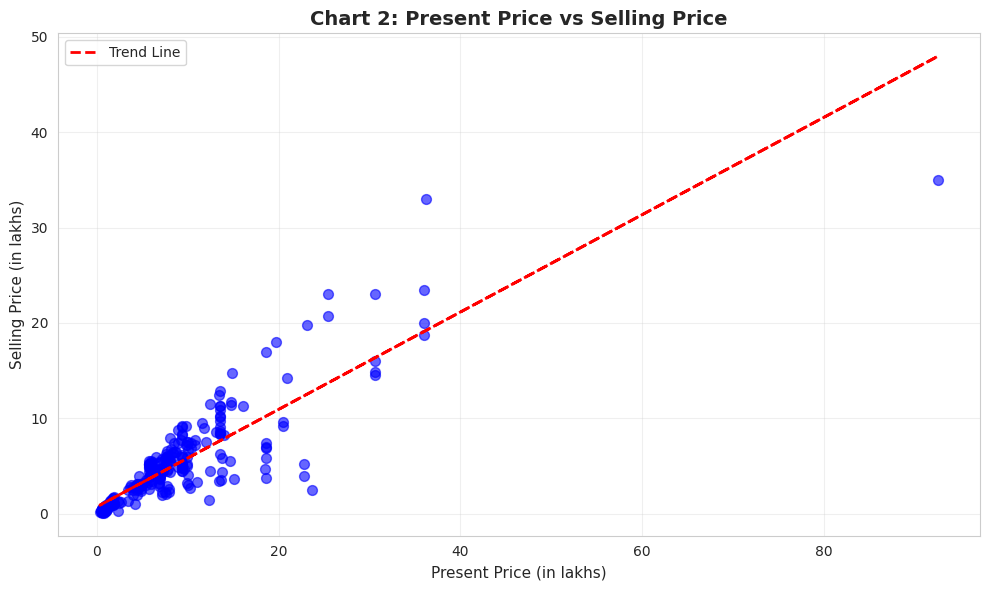

In [21]:
# Chart 2: Present Price vs Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['Present_Price'], df_viz['Selling_Price'],
            alpha=0.6, c='blue', s=50)
plt.title('Chart 2: Present Price vs Selling Price', fontsize=14, fontweight='bold')
plt.xlabel('Present Price (in lakhs)', fontsize=11)
plt.ylabel('Selling Price (in lakhs)', fontsize=11)
plt.grid(True, alpha=0.3)
# Add trend line
z = np.polyfit(df_viz['Present_Price'], df_viz['Selling_Price'], 1)
p = np.poly1d(z)
plt.plot(df_viz['Present_Price'], p(df_viz['Present_Price']),
         "r--", linewidth=2, label='Trend Line')
plt.legend()
plt.tight_layout()
plt.show()

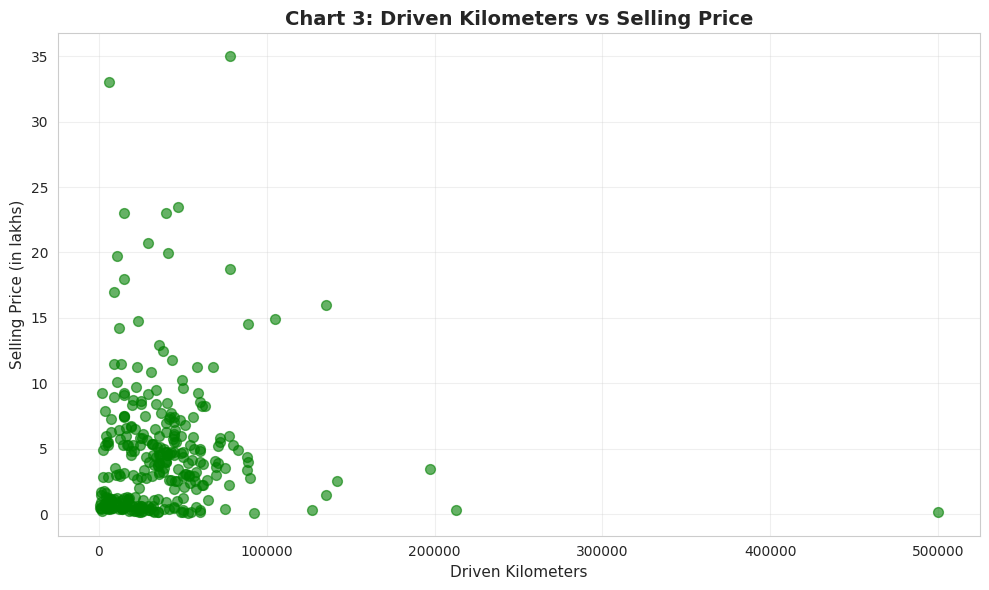

In [22]:
# Chart 3: Driven_kms vs Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['Driven_kms'], df_viz['Selling_Price'],
            alpha=0.6, c='green', s=50)
plt.title('Chart 3: Driven Kilometers vs Selling Price', fontsize=14, fontweight='bold')
plt.xlabel('Driven Kilometers', fontsize=11)
plt.ylabel('Selling Price (in lakhs)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

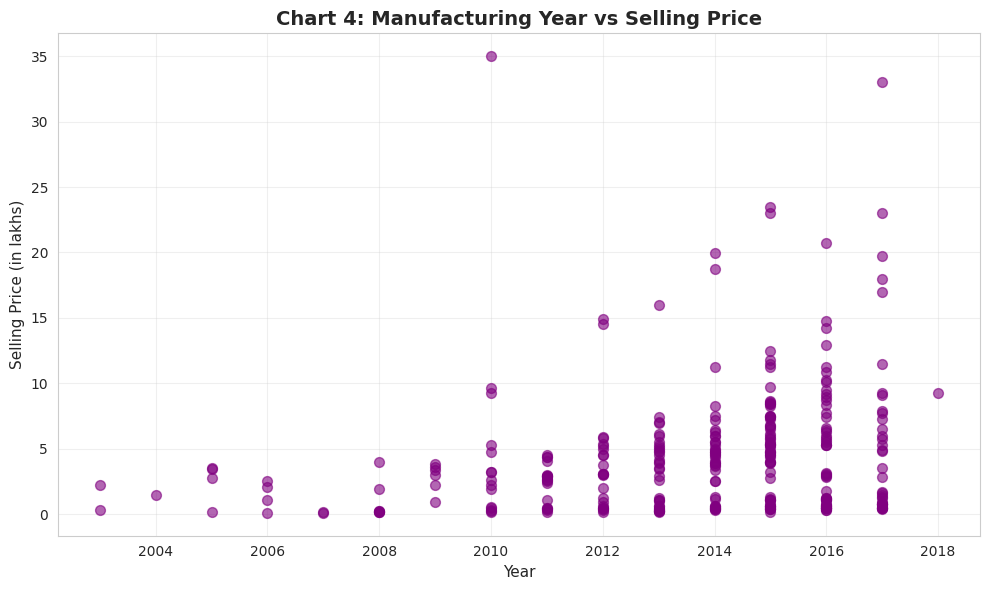

In [23]:
# Chart 4: Year vs Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['Year'], df_viz['Selling_Price'],
            alpha=0.6, c='purple', s=50)
plt.title('Chart 4: Manufacturing Year vs Selling Price', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Selling Price (in lakhs)', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

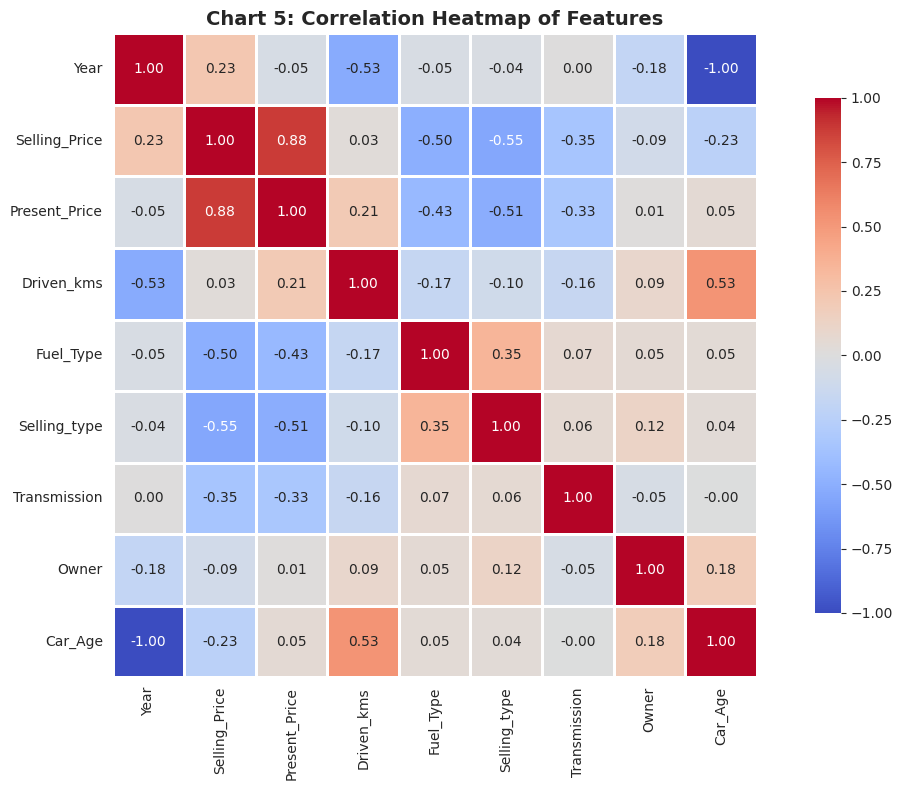

In [24]:
# Chart 5: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Chart 5: Correlation Heatmap of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


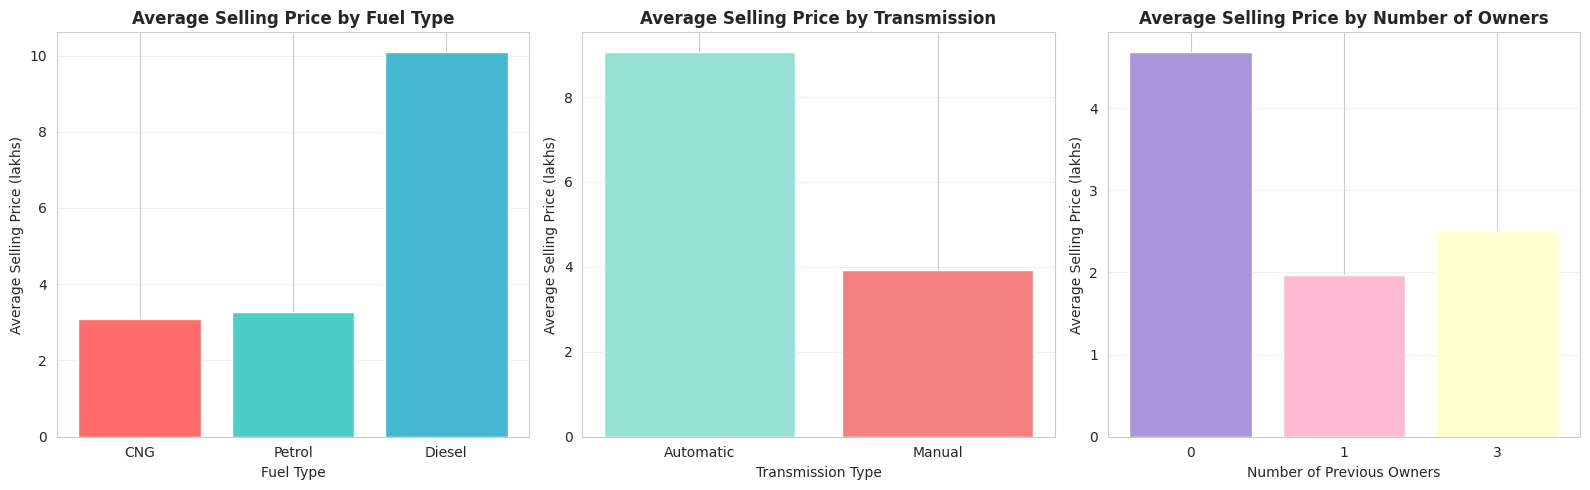

In [26]:

# Additional Visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Fuel Type vs Selling Price
fuel_avg = df_viz.groupby('Fuel_Type')['Selling_Price'].mean().sort_values()
axes[0].bar(fuel_avg.index, fuel_avg.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Average Selling Price by Fuel Type', fontweight='bold')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Average Selling Price (lakhs)')
axes[0].grid(axis='y', alpha=0.3)

# Transmission vs Selling Price
trans_avg = df_viz.groupby('Transmission')['Selling_Price'].mean()
axes[1].bar(trans_avg.index, trans_avg.values, color=['#95E1D3', '#F38181'])
axes[1].set_title('Average Selling Price by Transmission', fontweight='bold')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Average Selling Price (lakhs)')
axes[1].grid(axis='y', alpha=0.3)

# Owner vs Selling Price
owner_avg = df_viz.groupby('Owner')['Selling_Price'].mean()
axes[2].bar(owner_avg.index.astype(str), owner_avg.values, color=['#AA96DA', '#FCBAD3', '#FFFFD2'])
axes[2].set_title('Average Selling Price by Number of Owners', fontweight='bold')
axes[2].set_xlabel('Number of Previous Owners')
axes[2].set_ylabel('Average Selling Price (lakhs)')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### MACHINE LEARNING MODEL

In [27]:
print("\n" + "=" * 70)
print("MACHINE LEARNING MODEL TRAINING")
print("=" * 70)


MACHINE LEARNING MODEL TRAINING


In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Training set size: 239 samples
Testing set size: 60 samples


In [29]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [31]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

In [32]:
# Training metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [33]:

# Display results
print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS")
print("=" * 70)
print(f"\nModel: Linear Regression")
print(f"\n{'Metric':<30} {'Training Set':<20} {'Testing Set':<20}")
print("-" * 70)
print(f"{'Mean Absolute Error (MAE)':<30} {mae_train:<20.4f} {mae:<20.4f}")
print(f"{'Root Mean Squared Error (RMSE)':<30} {'-':<20} {rmse:<20.4f}")
print(f"{'R² Score':<30} {r2_train:<20.4f} {r2:<20.4f}")
print("-" * 70)


MODEL EVALUATION RESULTS

Model: Linear Regression

Metric                         Training Set         Testing Set         
----------------------------------------------------------------------
Mean Absolute Error (MAE)      1.0512               1.5408              
Root Mean Squared Error (RMSE) -                    2.5837              
R² Score                       0.9027               0.7410              
----------------------------------------------------------------------


In [34]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nFeature Importance (Coefficients):")
print(feature_importance.to_string(index=False))



Feature Importance (Coefficients):
      Feature  Coefficient
 Transmission    -1.577930
 Selling_type    -1.290578
    Fuel_Type    -1.224948
        Owner     0.698020
Present_Price     0.441254
         Year     0.171036
      Car_Age    -0.171036
   Driven_kms    -0.000009


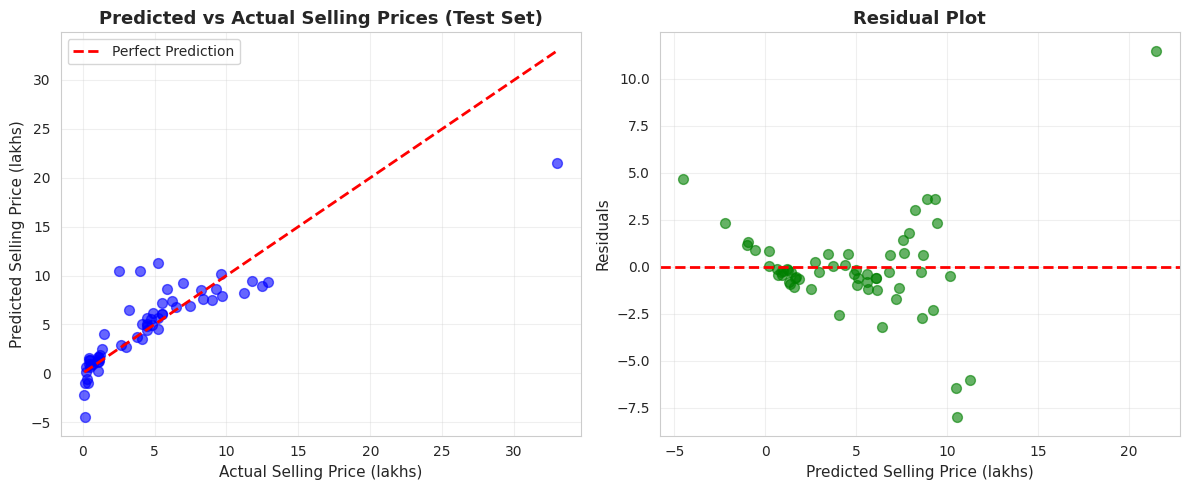

In [35]:
# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6, c='blue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.title('Predicted vs Actual Selling Prices (Test Set)', fontsize=13, fontweight='bold')
plt.xlabel('Actual Selling Price (lakhs)', fontsize=11)
plt.ylabel('Predicted Selling Price (lakhs)', fontsize=11)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, c='green', s=50)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot', fontsize=13, fontweight='bold')
plt.xlabel('Predicted Selling Price (lakhs)', fontsize=11)
plt.ylabel('Residuals', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### INTERACTIVE PREDICTION FUNCTION

In [37]:
# INTERACTIVE PREDICTION FUNCTION

def predict_car_price(year, present_price, driven_kms, fuel_type,
                      selling_type, transmission, owner):
    """
    Predict car selling price based on input features.

    Parameters:
    - year: Manufacturing year of the car
    - present_price: Current ex-showroom price (in lakhs)
    - driven_kms: Total kilometers driven
    - fuel_type: 'Petrol', 'Diesel', or 'CNG'
    - selling_type: 'Dealer' or 'Individual'
    - transmission: 'Manual' or 'Automatic'
    - owner: Number of previous owners (0, 1, 2, 3)

    Returns: Predicted selling price in lakhs
    """
    # Calculate car age
    car_age = current_year - year

    # Encode categorical variables
    fuel_encoded = label_encoders['Fuel_Type'].transform([fuel_type])[0]
    selling_encoded = label_encoders['Selling_type'].transform([selling_type])[0]
    trans_encoded = label_encoders['Transmission'].transform([transmission])[0]

    # Create input array in correct order
    input_data = np.array([[year, present_price, driven_kms, fuel_encoded,
                           selling_encoded, trans_encoded, owner, car_age]])

    # Predict
    predicted_price = model.predict(input_data)[0]
    return round(predicted_price, 2)

In [38]:
# Sample predictions
print("\n" + "=" * 70)
print("SAMPLE PREDICTIONS")
print("=" * 70)

sample1 = predict_car_price(2014, 5.59, 27000, 'Petrol', 'Dealer', 'Manual', 0)
print(f"\nSample 1:")
print(f"  Year: 2014, Present Price: 5.59L, Driven: 27000 km")
print(f"  Fuel: Petrol, Seller: Dealer, Transmission: Manual, Owner: 0")
print(f"  → Predicted Selling Price: ₹{sample1} lakhs")

sample2 = predict_car_price(2017, 9.85, 6900, 'Diesel', 'Dealer', 'Automatic', 0)
print(f"\nSample 2:")
print(f"  Year: 2017, Present Price: 9.85L, Driven: 6900 km")
print(f"  Fuel: Diesel, Seller: Dealer, Transmission: Automatic, Owner: 0")
print(f"  → Predicted Selling Price: ₹{sample2} lakhs")

sample3 = predict_car_price(2010, 3.45, 78000, 'Petrol', 'Individual', 'Manual', 2)
print(f"\nSample 3:")
print(f"  Year: 2010, Present Price: 3.45L, Driven: 78000 km")
print(f"  Fuel: Petrol, Seller: Individual, Transmission: Manual, Owner: 2")
print(f"  → Predicted Selling Price: ₹{sample3} lakhs")


SAMPLE PREDICTIONS

Sample 1:
  Year: 2014, Present Price: 5.59L, Driven: 27000 km
  Fuel: Petrol, Seller: Dealer, Transmission: Manual, Owner: 0
  → Predicted Selling Price: ₹3.95 lakhs

Sample 2:
  Year: 2017, Present Price: 9.85L, Driven: 6900 km
  Fuel: Diesel, Seller: Dealer, Transmission: Automatic, Owner: 0
  → Predicted Selling Price: ₹9.84 lakhs

Sample 3:
  Year: 2010, Present Price: 3.45L, Driven: 78000 km
  Fuel: Petrol, Seller: Individual, Transmission: Manual, Owner: 2
  → Predicted Selling Price: ₹1.26 lakhs


In [39]:
# Interactive user input
print("\n" + "=" * 70)
print("PREDICT YOUR CAR'S SELLING PRICE")
print("=" * 70)
print("\nEnter car details for price prediction:")
print("(Note: In Colab, input() works in the output cell)")

try:
    user_year = int(input("Manufacturing Year (e.g., 2015): "))
    user_present = float(input("Present/Ex-showroom Price in lakhs (e.g., 7.5): "))
    user_kms = int(input("Kilometers Driven (e.g., 45000): "))
    user_fuel = input("Fuel Type (Petrol/Diesel/CNG): ").strip()
    user_selling = input("Selling Type (Dealer/Individual): ").strip()
    user_trans = input("Transmission (Manual/Automatic): ").strip()
    user_owner = int(input("Number of Previous Owners (0/1/2/3): "))

    predicted = predict_car_price(user_year, user_present, user_kms,
                                  user_fuel, user_selling, user_trans, user_owner)

    print(f"\n{'='*70}")
    print(f"✓ PREDICTED SELLING PRICE: ₹{predicted} LAKHS")
    print(f"{'='*70}")

except ValueError:
    print("\n⚠ Invalid input format. Please enter numerical values correctly.")
except Exception as e:
    print(f"\n⚠ Error: {e}")
    print("Make sure categorical values match the dataset (case-sensitive).")

print("\n" + "=" * 70)
print("MODEL TRAINING COMPLETE!")
print("=" * 70)


PREDICT YOUR CAR'S SELLING PRICE

Enter car details for price prediction:
(Note: In Colab, input() works in the output cell)
Manufacturing Year (e.g., 2015): 2018
Present/Ex-showroom Price in lakhs (e.g., 7.5): 4.6
Kilometers Driven (e.g., 45000): 30000
Fuel Type (Petrol/Diesel/CNG): CNG
Selling Type (Dealer/Individual): Dealer
Transmission (Manual/Automatic): Manual
Number of Previous Owners (0/1/2/3): 0

✓ PREDICTED SELLING PRICE: ₹7.3 LAKHS

MODEL TRAINING COMPLETE!
